In [2]:
import glob
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from matplotlib import cm
import matplotlib.pyplot as plt
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['Times New Roman']
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['lines.markersize'] = 1
plt.rcParams['savefig.dpi'] = 1000
plt.rcParams['figure.dpi'] = 1000
plt.rcParams['font.size'] = 16

In [3]:
algs = ['fedavg', 'scaffold', 'fednova']

In [6]:
g_acc = [[] for _ in range(3)]
i = 0
for alg in algs:
    for log_file in sorted(glob.glob('logs/'+alg+'/*.log')):
        print(log_file)
        with open(log_file, 'r') as file:
            lines = file.readlines()
            g_acc[i].append(float(lines[-1][52:]))
    i += 1

logs/fedavg/experiment_log-2023-02-05-19_12-23.log
logs/fedavg/experiment_log-2023-02-06-06_19-55.log
logs/fedavg/experiment_log-2023-02-07-18_23-55.log
logs/fedavg/experiment_log-2023-02-08-05_42-09.log
logs/scaffold/experiment_log-2023-02-05-20_35-36.log
logs/scaffold/experiment_log-2023-02-06-07_37-20.log
logs/scaffold/experiment_log-2023-02-07-18_24-22.log
logs/scaffold/experiment_log-2023-02-08-05_44-33.log
logs/fednova/experiment_log-2023-02-05-20_36-21.log
logs/fednova/experiment_log-2023-02-06-07_28-40.log
logs/fednova/experiment_log-2023-02-07-18_24-44.log
logs/fednova/experiment_log-2023-02-08-05_30-23.log


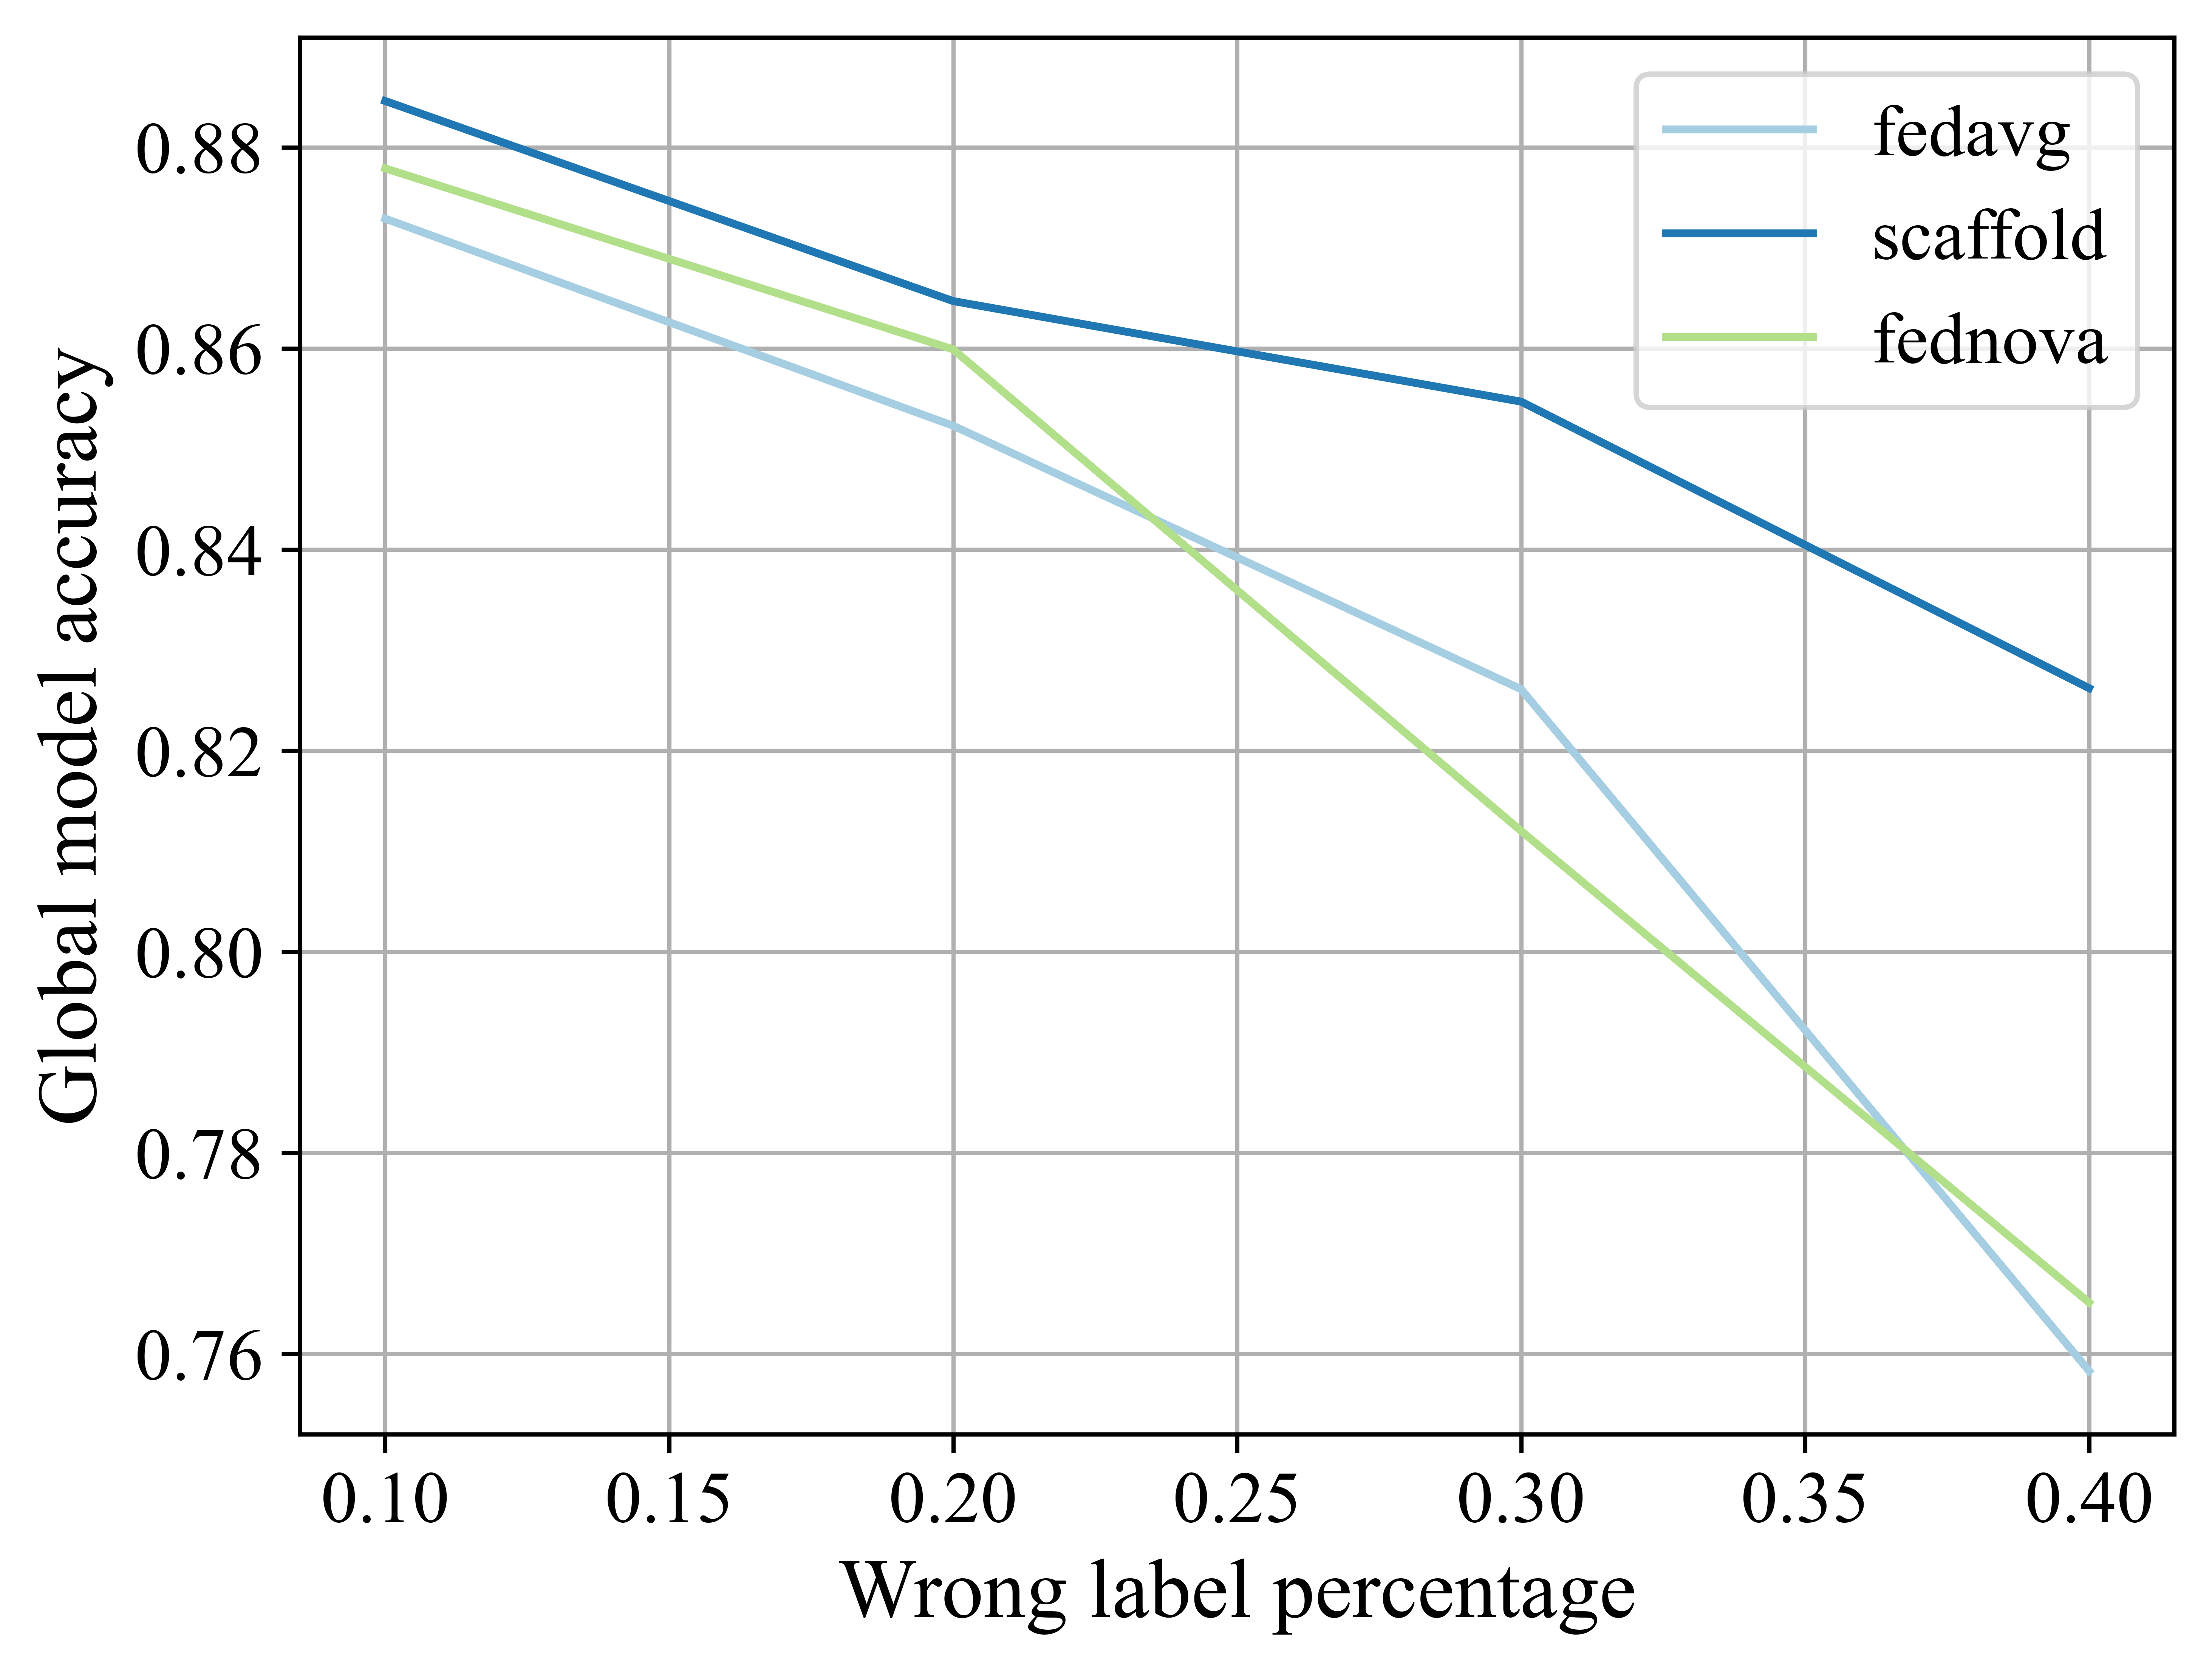

In [7]:
# iid global acc figure
plt.grid(True)
colors = cm.get_cmap('Paired')
for i in range(3):
    plt.plot([0.1, 0.2, 0.3, 0.4], g_acc[i], '-', label=algs[i], color=colors(i))
plt.xlabel('Wrong label percentage')
plt.ylabel('Global model accuracy')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
# plt.savefig('final_img_bulk/fig5.pdf', bbox_inches='tight')